In [132]:
import csv
import os
import pandas as pd
from urllib.request import urlopen
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

l2=[]
l3=[]
def loadfn(country,climtype):
    #header=["GCM",climtype,"from year","to_year","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec","country"]
    start_year=1920
    link="http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/miub_echo_g/"+climtype+"/1920/1939/"+country+".csv"
    with open(r"C:\\Users\\Admin\\"+country+climtype+".csv","w",newline='') as write_file:
        #as in get_and_write_data function
        f = csv.writer(write_file)
    write_file.close()
    response = urlopen(link)
    html = response.read().decode()
    with open("C:\\Users\\Admin\\"+country+climtype+".csv", "a",newline='') as write_file:
        #
        f = csv.writer(write_file)
        lines = html.strip().split("\n")
        flag=0
        for l in lines:
            if (l[0] =="#"):
                continue;
            elif l[0:10] in ["Not Availa", "There is n"]:
                continue
            else: #if doesn't have those it is data and so should be written
                l = l.split(",")
                #print(l)
                if(flag==0):
                    l.insert(0,"countries")
                    flag=1
                else:
                    l.insert(0,country)
                #it comes in as a String, so convert to a list for later easier writing and manipulation
                f.writerow(l)
           	#print ("Line Written")
        while(start_year!=2080):
            start_year=start_year+20
            link="http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/miub_echo_g/"+climtype+"/"+str(start_year)+"/"+str(start_year+19)+"/"+country+".csv"
            response = urlopen(link)
            html = response.read().decode()
            lines = html.strip().split("\n")
            for l in lines[1:]:
                    if l[0] =="#":
                        continue
                    elif l[0:10] in ["Not Availa", "There is n"]: #prevent it from writing lines  where no data is present (i.e. returns saying - "Not Available" or "There is no weather data available for the date provided. Past data is available from 1 July, 2008 onwards only.")
                        continue
                    elif l[15:17] in ["b1"]:
                        continue;
                    elif l[16:18] in ["b1"]:
                        continue;
                    else:
                        if ((l[15:17] in ["a2"]) or (l[16:18] in ["a2"])):
                            l=l.replace("a2,",'')
                        l = l.split(",")
                        #fill in missing values 2000 to 2020 if right year write to file directly
                        if(int(l[2])<1980 or int(l[2])>2020):
                            l.insert(0,country)
                            f.writerow(l)
                        elif(int(l[2])==1980):
                            l2=l
                            l.insert(0,country)
                            f.writerow(l)
                        elif(int(l[2])==2020):
                            l3=[l[0],l[1],"2000","2020"]
                            l3+=[str((float(x)+float(y))/2) for x,y in zip(l2[5:],l[4:])] #find avg of previous and future years
                            l3.insert(0,country)
                            l.insert(0,country)
                            f.writerow(l3)
                            f.writerow(l)
                            
    write_file.close()
#if(os.path.isfile('C:\\Users\\Admin\\'+country+'tas.csv') and(os.path.isfile('C:\\Users\\Admin\\'+country+'pr.csv'))):
       # print("Alr exist")
    #else:
    #matplotlib.rcParams['figure.figsize'] = [10,10]
lcountries=["USA","CHN","GBR","AUS","BGD","GNQ"]
for countries in lcountries:
    loadfn(countries,"pr")
    loadfn(countries,"tas")

In [137]:
li=[]
for countries in lcountries:
    df = pd.read_csv('C:\\Users\\Admin\\'+countries+'tas.csv', index_col="from_year", header=0)
    df2 = pd.read_csv('C:\\Users\\Admin\\'+countries+'pr.csv', index_col="from_year", header=0)
    li.append(df)
    li.append(df2)

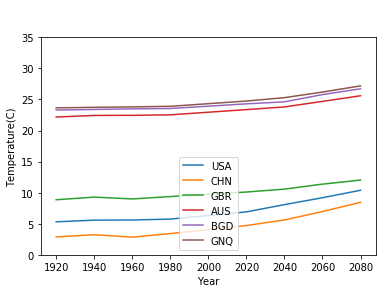

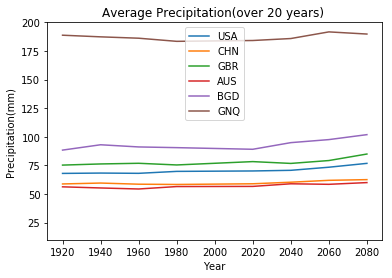

In [138]:
countryframe = pd.concat(li, axis=0)
l4=[]
l5=[]
for countryvar in lcountries:
    tc=countryframe[(countryframe['countries'] == countryvar) & (countryframe['var'] == "tas")]
    pc=countryframe[(countryframe['countries'] == countryvar) & (countryframe['var'] == "pr")]
    plt.figure(0)
    tc.loc[:,"Jan"::1].mean(axis=1).plot(label=countryvar)
    plt.title("Average temperature(over 20 years)")
    plt.ylim(0,35)
    plt.title("\n")
    plt.ylabel("Temperature(C)")
    plt.xlabel("Year")
    plt.legend()
    l4.append(tc.loc[:,"Jan"::1].mean(axis=1).mean())
    plt.figure(1)
    pc.loc[:,"Jan"::1].mean(axis=1).plot(label=countryvar)
    plt.ylim(10,200)
    plt.title("Average Precipitation(over 20 years) ")
    plt.ylabel("Precipitation(mm) ")
    plt.xlabel("Year")
    plt.legend()
    l5.append(pc.loc[:,"Jan"::1].mean(axis=1).mean())


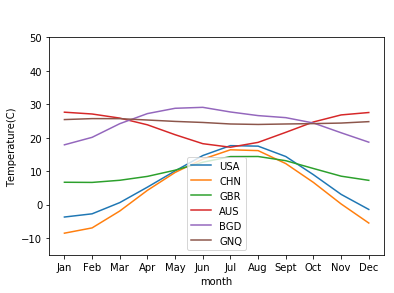

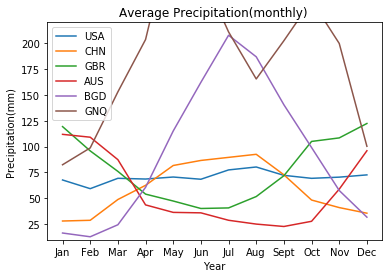

In [139]:
for countryvar in lcountries:  
    tc=countryframe[(countryframe['countries'] == countryvar) & (countryframe['var'] == "tas")]
    pc=countryframe[(countryframe['countries'] == countryvar) & (countryframe['var'] == "pr")]
    plt.figure(2)
    tc.loc[:,"Jan"::1].mean().plot(label=countryvar)
    plt.title("Average temperature(Monthly)")
    plt.ylim(-15,50)
    plt.title("\n")
    plt.xticks(range(12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
    plt.legend()
    plt.ylabel("Temperature(C)")
    plt.xlabel("month")

    
    plt.figure(3)
    pc.loc[:,"Jan"::1].mean().plot(label=countryvar)
    plt.ylim(10,220)
    plt.xticks(range(12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
    plt.title("Average Precipitation(monthly) ")
    plt.ylabel("Precipitation(mm) ")
    plt.xlabel("Year")
    plt.legend()
    

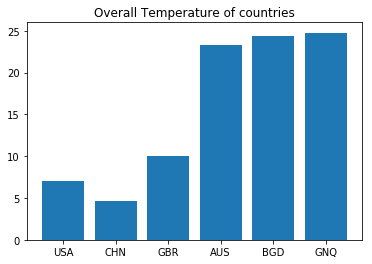

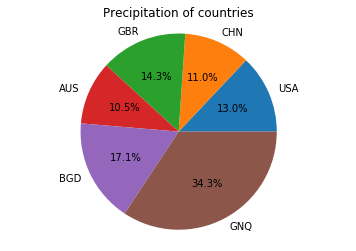

In [140]:
figno=4
plt.figure(figno)
plt.title("Overall Temperature of countries")
plt.bar(lcountries,l4)
figno+=1
plt.figure(figno)
plt.title("Precipitation of countries")
plt.pie(l5,labels=lcountries,autopct='%1.1f%%')
plt.axis('equal')
plt.show()
figno+=1

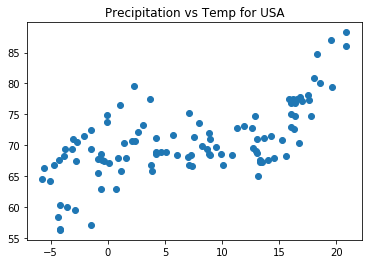

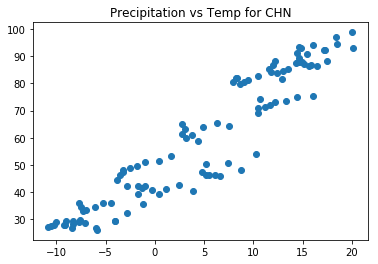

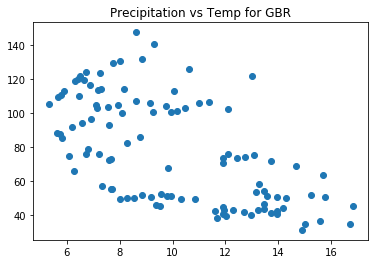

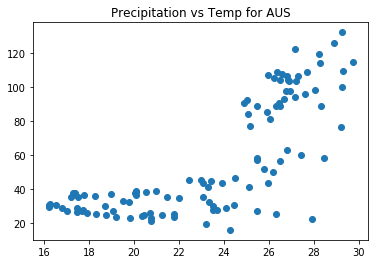

In [124]:
for countryvar in lcountries:
    tc=countryframe[(countryframe['countries'] == countryvar) & (countryframe['var'] == "tas")]
    pc=countryframe[(countryframe['countries'] == countryvar) & (countryframe['var'] == "pr")]
    plt.figure(figno)
    figno+=1
    plt.scatter(tc.loc[:,"Jan"::1].values.tolist(),pc.loc[:,"Jan"::1].values.tolist())
    plt.title("Precipitation vs Temp for "+countryvar)